# Модель машинного обучения для распознавания рукописных цифр
Выполнил: Шутов Захар

Подключение библиотек

In [221]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from random import randrange

## Загрузка данных из датасета MNIST

In [222]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [223]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## Визуализация данных
Выведем несколько изображений из обучающей выборки с их метками

label: 5


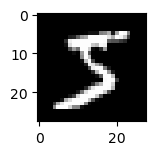

label: 0


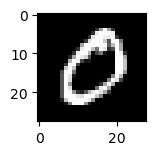

label: 4


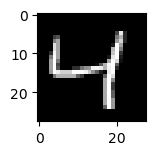

label: 1


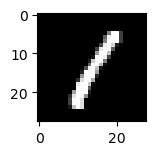

In [224]:
for i in range(4):  
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
 print('label:', y_train[i])
 pyplot.show()

## Разделение данных
Поскольку в задании требуется разделить данные на обучающую и тестовую выборку в соотношении 80/20, а после загрузки данные не удовлетворяют условиям, то возьмем обучающую выборку, состоящую из 60000 элементов, и разделим её в соотношении 80/20.

In [225]:
x_train, x_test, y_train, y_test  = train_test_split(x_train, y_train, test_size=0.2)
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (48000, 28, 28, 1)
Y_train: (48000,)
X_test:  (12000, 28, 28, 1)
Y_test:  (12000,)


## Подготовка данных
Изменяем набор данных, чтобы иметь один канал

In [226]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

Нормализуем данные до диапазона [0, 1]

In [227]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Преобразуем векторные классы в бинарные матрицы с длиной 10, методом «one-hot encoding»

In [228]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Создание модели нейронной сети
Создаем модель нейронной сети, состоящую из трех слоев

In [229]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

Компилируем сеть

In [230]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Обучение модели

In [231]:
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.2542 - accuracy: 0.9237 - val_loss: 0.1411 - val_accuracy: 0.9555
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.0986 - val_accuracy: 0.9707
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0958 - val_accuracy: 0.9729
Epoch 4/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0823 - val_accuracy: 0.9773
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0966 - val_accuracy: 0.9744
Epoch 6/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.1014 - val_accuracy: 0.9728
Epoch 7/10
300/300 [==============================] - 7s 23ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0975 - val_accuracy: 0.9749

Сохраняем модель

In [232]:
model.save('mnist.h5')
print("Модель сохранена как mnist.h5")

Модель сохранена как mnist.h5


## Оценка модели

In [233]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Потери на тесте:', score[0])
print('Точность на тесте:', score[1])

Потери на тесте: 0.0988527238368988
Точность на тесте: 0.9760000109672546


## Итог

После оценки модели на тестовой выборке она показала точность более 97%

## Пример работы модели 
Пример предсказания модели для 5 случайных изображений из тестовой выборки

375/375 [==============================] - 3s 8ms/step
Predict: 8


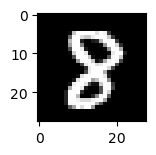

Predict: 2


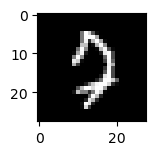

Predict: 7


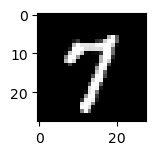

Predict: 8


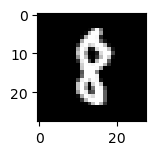

Predict: 5


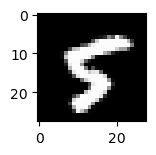

In [234]:
pred = model.predict(x_test)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
for i in range(5): 
 num = randrange(12000)
 prediction = np.argmax(pred[num])
 print('Predict:', prediction)
 pyplot.subplot(330 + 1)
 pyplot.imshow(x_test[num], cmap=pyplot.get_cmap('gray'))
 pyplot.show()